## Poboljšanje rezultata

In [448]:
import pandas as pd
import numpy as np

In [449]:
df = pd.read_csv("clean_data.csv")

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                563 non-null    int64  
 1   radius_mean              563 non-null    float64
 2   texture_mean             563 non-null    float64
 3   perimeter_mean           563 non-null    float64
 4   area_mean                563 non-null    float64
 5   smoothness_mean          563 non-null    float64
 6   compactness_mean         563 non-null    float64
 7   concavity_mean           563 non-null    float64
 8   concave points_mean      563 non-null    float64
 9   symmetry_mean            563 non-null    float64
 10  radius_se                563 non-null    float64
 11  perimeter_se             563 non-null    float64
 12  area_se                  563 non-null    float64
 13  smoothness_se            563 non-null    float64
 14  compactness_se           5

In [451]:
y = df['diagnosis']

In [452]:
y

0      1
1      1
2      1
3      1
4      1
      ..
558    1
559    1
560    1
561    1
562    0
Name: diagnosis, Length: 563, dtype: int64

In [453]:
X = df.drop(['diagnosis'], axis=1)

In [454]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,1.0950,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.5435,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.7456,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.4956,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.7572,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,1.1760,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
559,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.7655,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
560,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.4564,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
561,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.7260,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [455]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

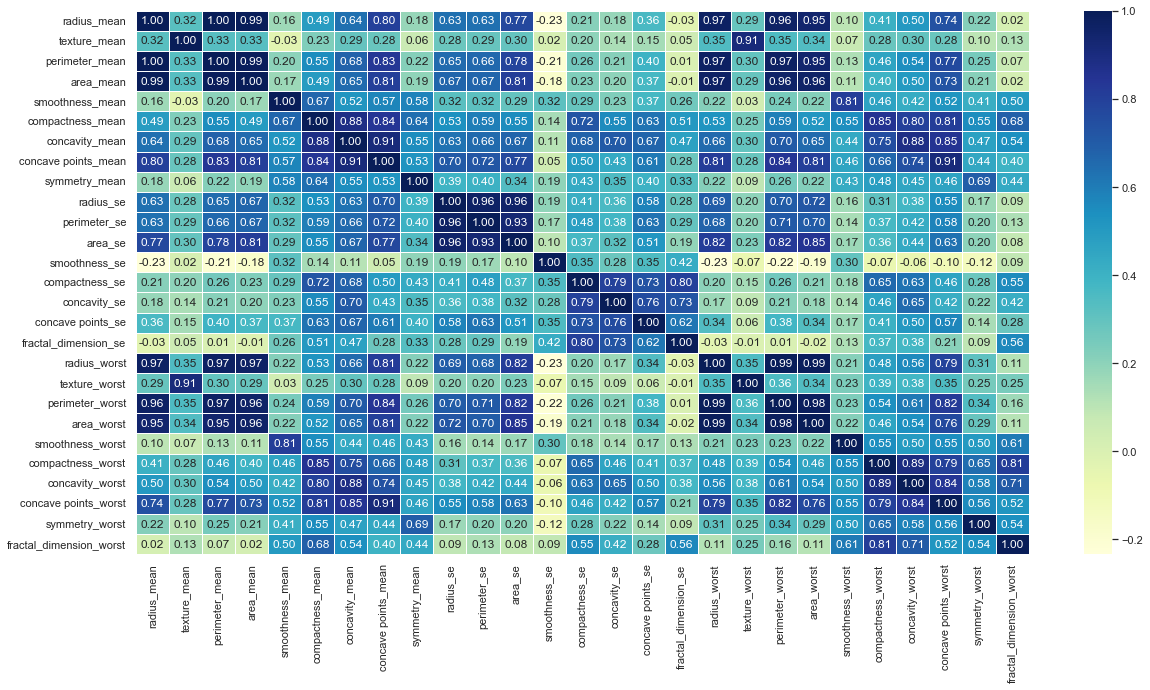

In [456]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.show()

In [457]:
corrs = X_train.corr()
highly_correlated = {}
for i in range(len(corrs.columns)): 
    for j in range(i):
        if corrs.iloc[i,j] > 0.95:
            f1 = corrs.columns[i]
            f2 = corrs.columns[j]
            corr = corrs.iloc[i,j]
            highly_correlated[(f1,f2)] = corr

for features, correlation in highly_correlated.items():
    print(f"Features: {features}, Correlation: {correlation}")

Features: ('perimeter_mean', 'radius_mean'), Correlation: 0.9974406816814165
Features: ('area_mean', 'radius_mean'), Correlation: 0.9905662708997517
Features: ('area_mean', 'perimeter_mean'), Correlation: 0.989280947926703
Features: ('perimeter_se', 'radius_se'), Correlation: 0.9636059355473996
Features: ('area_se', 'radius_se'), Correlation: 0.9551949821099318
Features: ('radius_worst', 'radius_mean'), Correlation: 0.9677043093498081
Features: ('radius_worst', 'perimeter_mean'), Correlation: 0.9677058007612598
Features: ('radius_worst', 'area_mean'), Correlation: 0.9651348494714247
Features: ('perimeter_worst', 'radius_mean'), Correlation: 0.9625207714859416
Features: ('perimeter_worst', 'perimeter_mean'), Correlation: 0.9686746719756937
Features: ('perimeter_worst', 'area_mean'), Correlation: 0.9606028493120351
Features: ('perimeter_worst', 'radius_worst'), Correlation: 0.9927052667273181
Features: ('area_worst', 'area_mean'), Correlation: 0.9611398775608173
Features: ('area_worst', 

In [458]:
X_train.drop(['perimeter_mean', 'area_mean', 'radius_worst', 'area_worst', 'perimeter_worst', 'perimeter_se', 'area_se'], axis=1, inplace=True)

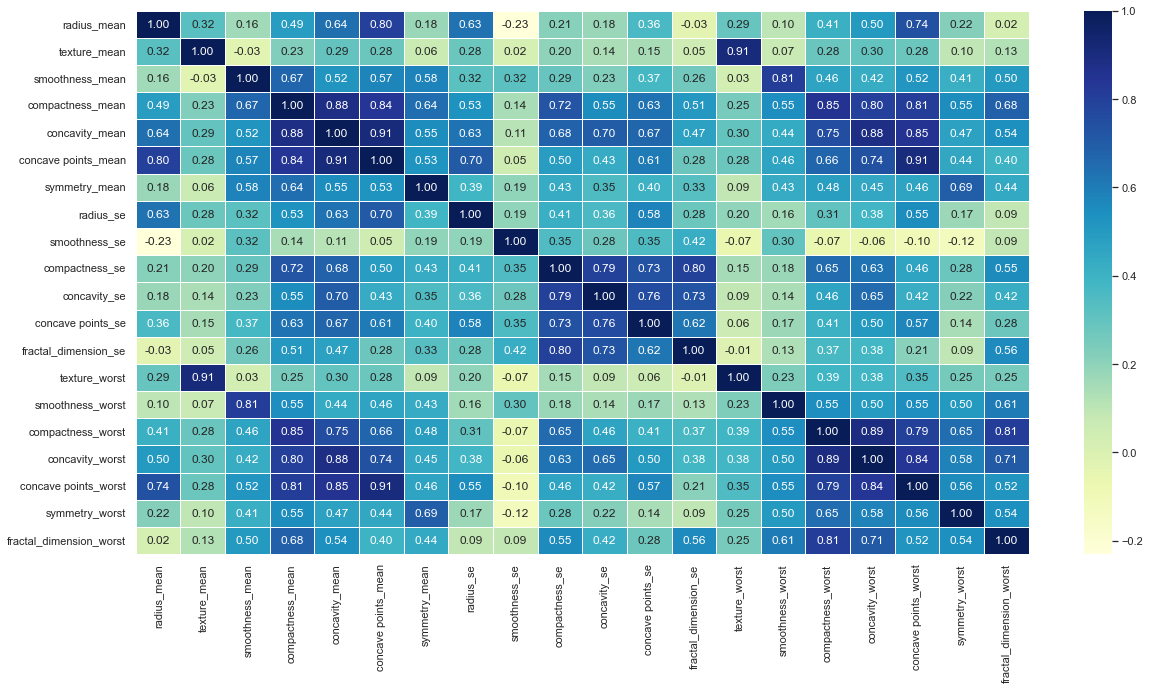

In [459]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.show()

In [460]:
X_test.drop(['perimeter_mean', 'area_mean', 'radius_worst', 'area_worst', 'perimeter_worst', 'perimeter_se', 'area_se'], axis=1, inplace=True)

In [461]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.fit_transform(X_test)

array([[-1.12451272, -0.75068575,  0.82106532, ..., -0.2499297 ,
        -0.38107595,  0.81357828],
       [-0.7584203 , -0.04317755, -0.80479686, ..., -0.69988645,
         0.29392963,  0.00643893],
       [ 0.20395904, -0.61215267,  0.24839002, ..., -0.18623452,
        -1.06240477,  0.1572795 ],
       ...,
       [ 2.13703798,  0.66433066,  0.8368198 , ...,  1.87947605,
        -0.17082831,  0.17150974],
       [-0.63916291, -0.88179741,  0.1223542 , ..., -0.55847147,
         0.83772804, -0.19847656],
       [-0.58646779, -1.46561536,  0.86045151, ..., -0.4773916 ,
         0.98000088,  0.55117261]])

In [462]:
from sklearn.decomposition import PCA

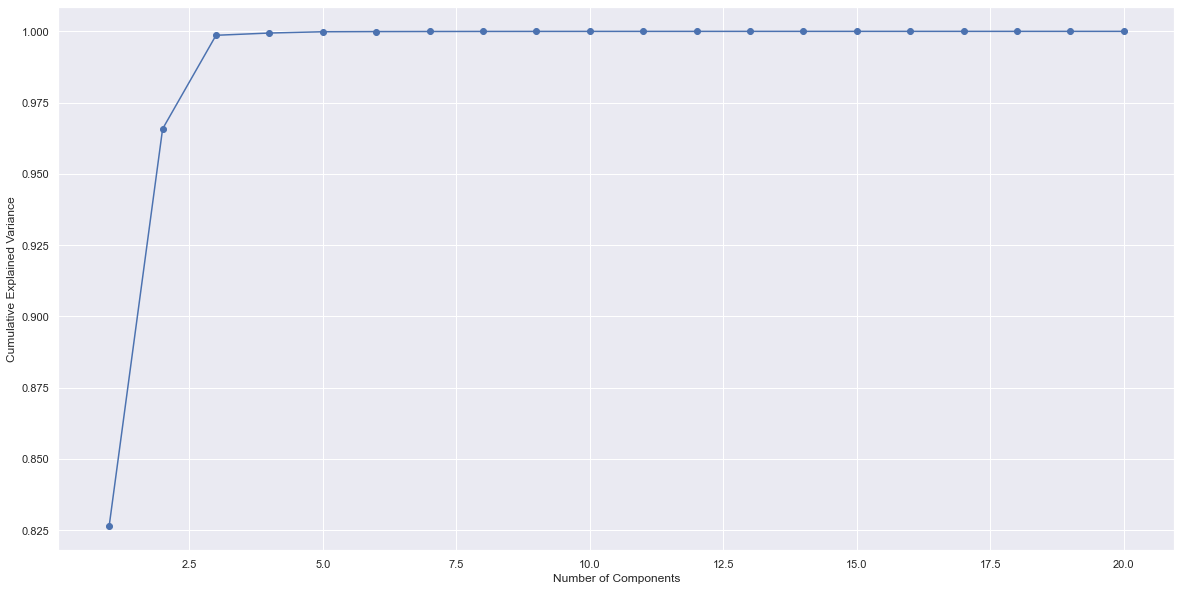

In [463]:
pca = PCA()
X_train_red = pca.fit_transform(X_train)

explained_variance = pca.explained_variance_ratio_

cumulative_explained_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [464]:
pca = PCA(n_components=4)
X_train_red = pca.fit_transform(X_train)
X_test_red = pca.transform(X_test)

### Logistic regression

In [465]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [466]:
logreg = LogisticRegression()
logreg.fit(X_train_red,y_train)

y_pred_train = logreg.predict(X_train_red)
y_pred_test = logreg.predict(X_test_red)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))

Training accuracy: 0.9407582938388626
Testing accuracy: 0.9645390070921985


### SVM

In [467]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_red, y_train)
y_pred_train = svc.predict(X_train_red)
y_pred_test = svc.predict(X_test_red)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))

Training accuracy: 0.9241706161137441
Testing accuracy: 0.9148936170212766


### Random Forest

In [468]:
from sklearn.ensemble import RandomForestClassifier

In [469]:
randfor = RandomForestClassifier()
randfor.fit(X_train_red, y_train)
y_pred_train = randfor.predict(X_train_red)
y_pred_test = randfor.predict(X_test_red)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))

Training accuracy: 1.0
Testing accuracy: 0.950354609929078


### Naive Bayes

In [470]:
from sklearn.naive_bayes import GaussianNB

In [471]:
gnb = GaussianNB()
gnb.fit(X_train_red, y_train)
y_pred_train = gnb.predict(X_train_red)
y_pred_test = gnb.predict(X_test_red)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))

Training accuracy: 0.8933649289099526
Testing accuracy: 0.9290780141843972


### Decision tree

In [472]:
from sklearn.tree import DecisionTreeClassifier

In [473]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train_red, y_train)

y_pred_train = dectree.predict(X_train_red)
y_pred_test = dectree.predict(X_test_red)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))

Training accuracy: 1.0
Testing accuracy: 0.8936170212765957


### KNN

In [474]:
from sklearn.neighbors import KNeighborsClassifier

In [475]:
neigh = KNeighborsClassifier()
neigh.fit(X_train_red, y_train)

y_pred_train = neigh.predict(X_train_red)
y_pred_test = neigh.predict(X_test_red)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))

Training accuracy: 0.9312796208530806
Testing accuracy: 0.8936170212765957
